# Neural Network for Handwritten Digit Recognition, Multiclass

We will use a neural network to recognize the hand-written digits 0-9.

- The data set contains 60000 training examples and 10000 test examples of handwritten digits.  

    - Each training example is a 28-pixel x 28-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 28 by 28 grid of pixels is “unrolled” into a 784-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 60000 x 784 matrix `X` where every row is a training example of a handwritten digit image.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization, InputLayer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [7]:
train_data = np.loadtxt('mnist_train.csv', delimiter=",")
test_data = np.loadtxt('mnist_test.csv', delimiter=",")
X_train = train_data[:, 1:]
y_train = train_data[:, :1].astype(int) # As int to be used later in the visualization
X_test = test_data[:, 1:]
y_test = test_data[:, :1].astype(int)

Size of the dataset

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

In [9]:
X_train[0] # The first element of X_train

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [10]:
y_train[0,0] # The first element of y_train

5

In [11]:
y_train[-1,0] # The last element of y

8

We will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 81 rows from `X_train`, maps each row back to a 28 pixel by 28 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

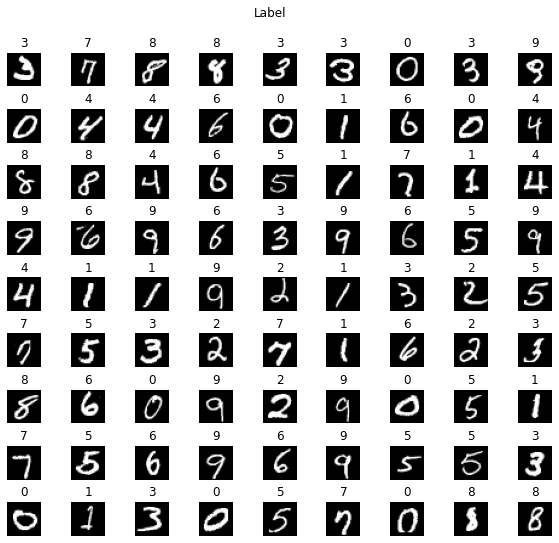

In [44]:
m, n = X_train.shape

fig, axes = plt.subplots(9, 9, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape(28,28)

    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(f'{int(y_train[random_index,0])}')
    ax.set_axis_off()

fig.suptitle('Label');

First normalize the data for a faster gradient descent.

In [37]:
norm = Normalization()
norm.adapt(X_train) # Learning mean and variance 
Xn_train = norm(X_train).numpy() # converting to numpy array
Xn_test = norm(X_test).numpy()

### Building the neural network.

The parameters have dimensions that are sized for a neural network with 35  units in layer 1, 25  units in layer 2,  15  units in layer 2 and  10  output units in layer 4, one for each digit.

In [64]:
model = Sequential(
    [
        InputLayer((784,)),
        Dense(35, 'relu'),
        Dense(25, 'relu'),
        Dense(15, 'relu'),
        Dense(10, 'linear') 
    ]
)
# For the accuracy of the last layer outputs, use linear instead of softmax
# and the class SparseCategoricalCrossentropy will have an arg from_logits=True

In [65]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 35)                27475     
                                                                 
 dense_10 (Dense)            (None, 25)                900       
                                                                 
 dense_11 (Dense)            (None, 15)                390       
                                                                 
 dense_12 (Dense)            (None, 10)                160       
                                                                 
Total params: 28,925
Trainable params: 28,925
Non-trainable params: 0
_________________________________________________________________


The following code:
* defines a loss function, `SparseCategoricalCrossentropy` and indicates the softmax should be included with the  loss calculation by adding `from_logits=True`)
* defines an optimizer. A popular choice is Adaptive Moment (Adam).

In [66]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam() # default learning_rate is 0.001
)

model.fit(
    Xn_train, y_train,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3525
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1469
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1098
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0745
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0597
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517
Epoch 9/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0479
Epoch 10/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443
Epoch 11/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0423
Epoch 12/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0375
E

Let's compare the predictions vs the labels for a random sample of 81 digits in the test data.

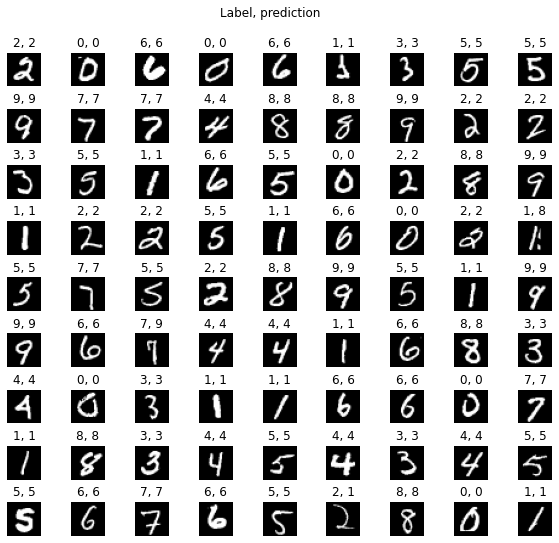

In [67]:
m, n = X_test.shape

fig, axes = plt.subplots(9, 9, figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X_test[random_index].reshape(28,28)

    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using our neural network
    pred = model.predict(Xn_test[random_index].reshape(1,784))
    yhat = np.argmax(pred)

    ax.set_title(f'{y_test[random_index,0]}, {yhat}')
    ax.set_axis_off()
fig.suptitle('Label, prediction');

Let's check the number of errors.

In [68]:
def display_number_of_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1) # Finds the highest value in each subarray 
    idxs = np.where(yhat != y[:,0])[0]
    return len(idxs)

In [69]:
print(f'{display_number_of_errors(model, Xn_test, y_test)} errors out of {len(X_test)} images')

364 errors out of 10000 images


Let's calculate the accuracy.

In [70]:
def display_accuracy(model,X,y):
    n_errors = display_number_of_errors(model,X,y)
    acc = (len(X) - n_errors) / len(X)
    return acc

In [71]:
print(f'The accuracy of the model = {display_accuracy(model, Xn_test, y_test)}')

The accuracy of the model = 0.9636
